In [ ]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/graduate-admissions/Admission_Predict.csv
/kaggle/input/graduate-admissions/Admission_Predict_Ver1.1.csv


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Loading Dataset

In [ ]:
df = pd.read_csv('/kaggle/input/graduate-admissions/Admission_Predict_Ver1.1.csv')

In [ ]:
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [ ]:
y = df["Chance of Admit "]
x = df.drop(["Chance of Admit ","Serial No."], axis=1)

## Principal Component Analysis

In [ ]:
pca = PCA(n_components=2)
pca.fit(x)
X_pca = pca.transform(x)

In [ ]:
X_pca_df = pd.DataFrame(X_pca, columns=["PC1","PC2"])
X_pca_df

,PC1,PC2
0,-23.273887,-0.783279
1,-6.811715,3.351076
2,1.841991,2.687708
3,-6.140811,-0.024660
4,4.212021,2.824404
...,...,...
495,-14.484897,5.912684
496,-22.957009,-0.008506
497,-17.942750,-5.731901
498,5.690921,1.610405


Text(0, 0.5, 'PC2')

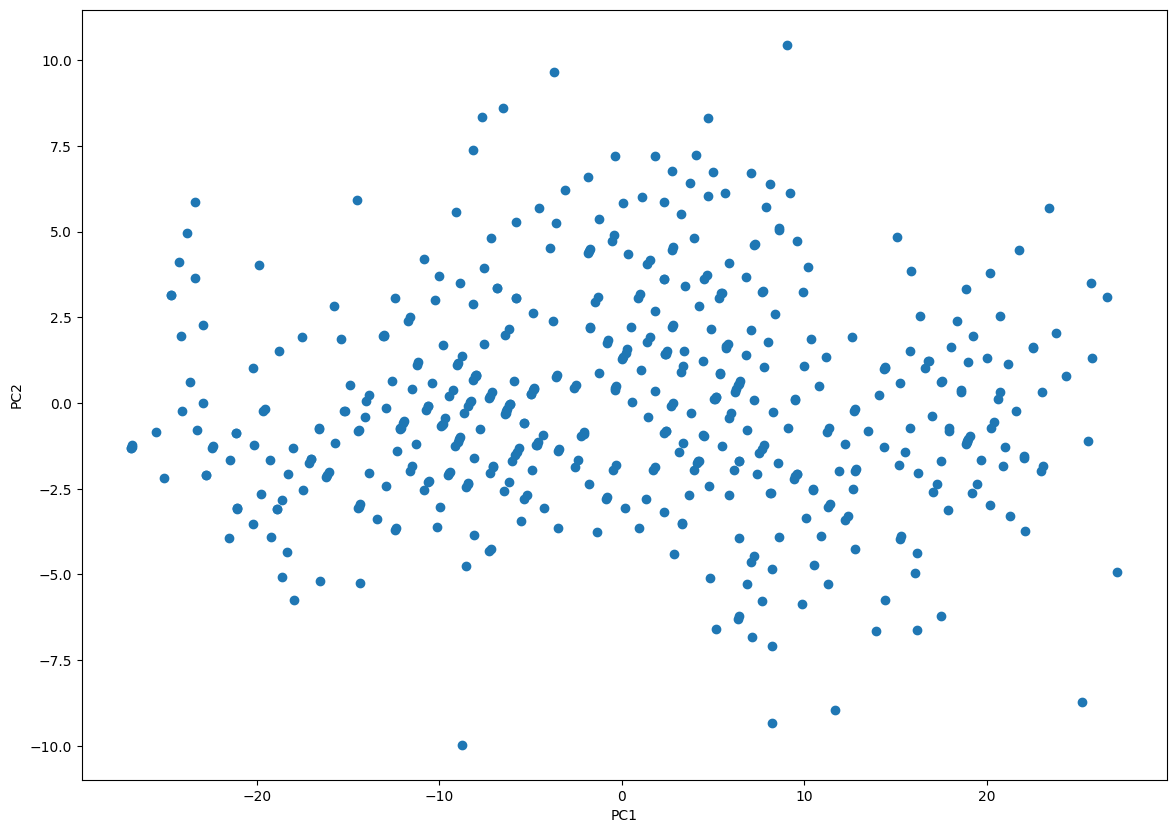

In [ ]:
plt.figure(figsize=(14,10))
plt.scatter(X_pca_df["PC1"], X_pca_df["PC2"])
plt.xlabel('PC1')
plt.ylabel('PC2')

In [ ]:
PCA_max = np.argmax(X_pca_df["PC1"])
PCA_min = np.argmin(X_pca_df["PC1"])

In [ ]:
print("PCA_Max :", PCA_max)
print("PCA_min :", PCA_min)

PCA_Max : 377
PCA_min : 202


In [ ]:
x.iloc[PCA_max,:]

GRE Score            290.00
TOEFL Score          100.00
University Rating      1.00
SOP                    1.50
LOR                    2.00
CGPA                   7.56
Research               0.00
Name: 377, dtype: float64

In [ ]:
x.iloc[PCA_min,:]

GRE Score            340.00
TOEFL Score          120.00
University Rating      5.00
SOP                    4.50
LOR                    4.50
CGPA                   9.91
Research               1.00
Name: 202, dtype: float64

## Scale Data

In [ ]:
scaler = MinMaxScaler()
x = scaler.fit_transform(X_pca_df)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x,y,train_size=0.8, shuffle=True,random_state=42)

## Train Linear Regression Model

In [ ]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

## LR Evaluation

In [ ]:
lr.score(X_test, y_test)

0.660354611264309

In [ ]:
pred = lr.predict(X_test)

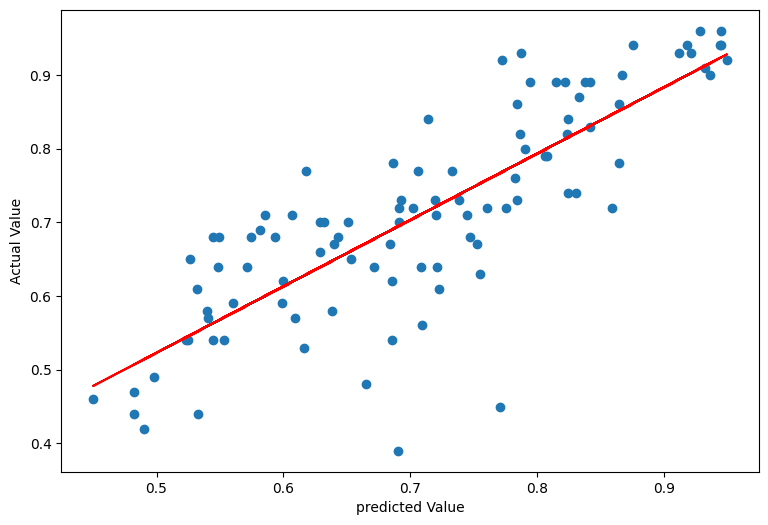

In [ ]:
plt.figure(figsize=(9,6))
plt.plot(pred,y_test, 'o')
plt.xlabel('predicted Value')
plt.ylabel('Actual Value')
m, b = np.polyfit(pred, y_test, 1)
plt.plot(pred, m*pred+b, color='red')
plt.show()

## Pycaret Compare_Models

In [ ]:
!pip install pycaret -q

In [ ]:
from pycaret.regression import *

In [ ]:
new_df = X_pca_df.copy()

In [ ]:
new_df["Chance"] = y.tolist()

In [ ]:
setup(data = new_df,target='Chance')

,Description,Value
0,Session id,5724
1,Target,Chance
2,Target type,Regression
3,Original data shape,"(500, 3)"
4,Transformed data shape,"(500, 3)"
5,Transformed train set shape,"(350, 3)"
6,Transformed test set shape,"(150, 3)"
7,Numeric features,2
8,Preprocess,True
9,Imputation type,simple


In [ ]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
br,Bayesian Ridge,0.0592,0.0059,0.0761,0.6568,0.0462,0.0924,0.0250
lr,Linear Regression,0.0592,0.0059,0.0761,0.6566,0.0462,0.0924,0.4170
ridge,Ridge Regression,0.0592,0.0059,0.0761,0.6566,0.0462,0.0924,0.0250
lar,Least Angle Regression,0.0592,0.0059,0.0761,0.6566,0.0462,0.0924,0.0330
huber,Huber Regressor,0.0581,0.0060,0.0764,0.6526,0.0465,0.0923,0.0280
omp,Orthogonal Matching Pursuit,0.0598,0.0061,0.0774,0.6481,0.0469,0.0935,0.0250
lightgbm,Light Gradient Boosting Machine,0.0633,0.0070,0.0823,0.6012,0.0500,0.0995,0.2180
gbr,Gradient Boosting Regressor,0.0635,0.0071,0.0830,0.5936,0.0506,0.1002,0.1310
knn,K Neighbors Regressor,0.0649,0.0071,0.0831,0.5869,0.0504,0.1015,0.0260
catboost,CatBoost Regressor,0.0646,0.0071,0.0837,0.5865,0.0509,0.1010,1.1170


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

BayesianRidge()

Linear Regression is actually performing very well, but the Bayesian Ridge is Slightly better